Convolutional neural network (CNN)
• Use any dataset of plant disease and design a plant disease detection system using CNN.

• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Build the model
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=1, validation_split=0.2)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.8666 - loss: 0.3636 - val_accuracy: 0.8705 - val_loss: 0.3498


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8689 - loss: 0.3637
Test accuracy: 0.8666


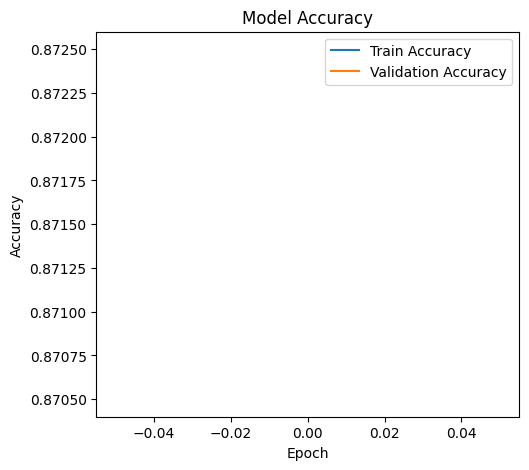

In [11]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

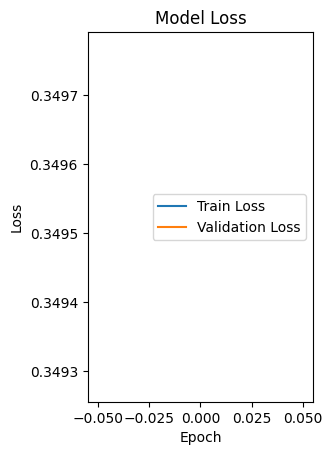

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [17]:
# Predict on test images
predictions = model.predict(x_test[:15])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


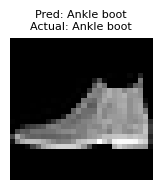

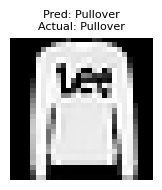

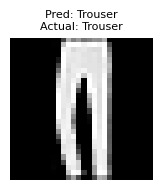

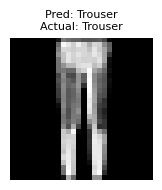

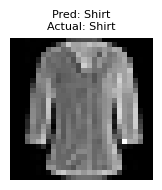

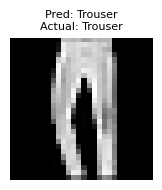

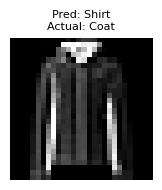

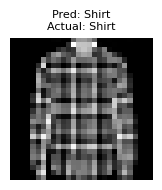

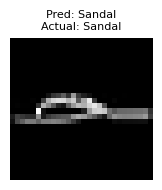

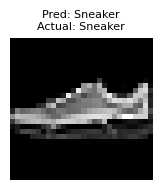

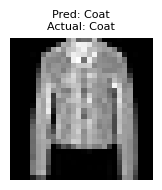

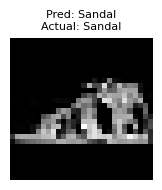

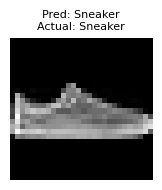

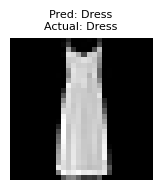

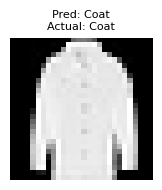

In [18]:
# Show predictions for first 5 test images
for i in range(15):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i]]}", fontsize=8)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Okay, absolutely! Let's do a simple, cell-by-cell explanation of your `Ass_3.ipynb` (Fashion MNIST CNN) code, similar to how we did for `Ass_2.ipynb`. We'll cover the purpose of each cell and the key CNN-related terms.

This will be perfect for explaining it to your sir!

---

**File: Ass_3.ipynb - Fashion Item Classifier using CNN**

*(Goal: Teach the computer to look at an image of a piece of clothing and tell us what category it belongs to, like 'T-shirt', 'Trouser', 'Bag', etc.)*

**Cell 0 & 1: Markdown**
```markdown
Convolutional neural network (CNN)
• Use any dataset of plant disease and design a plant disease detection system using CNN.
---
• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories
```
*   **What it is:** These are text cells. The second one describes the problem you're solving: classifying fashion items from the Fashion MNIST dataset using a CNN.

**Cell 2: Imports**
```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
```
*   **What it does:** Brings in the necessary tools (libraries).
*   **Terminology:**
    *   `tensorflow` (`tf`): A powerful library for Deep Learning.
    *   `keras`: A user-friendly way to build Deep Learning models within TensorFlow.
    *   `layers`: Contains the building blocks for your neural network (like convolutional layers, dense layers, etc.).
    *   `matplotlib.pyplot` (`plt`): A library for creating plots and showing images.
    *   `numpy` (`np`): For efficient numerical operations, especially with image data (which are arrays of numbers).

**Cell 3: Load Fashion MNIST Dataset**
```python
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```
*   **What it does:** Loads the Fashion MNIST dataset, which is built into Keras.
    *   The dataset contains 70,000 grayscale images (28x28 pixels) of 10 different types of fashion items.
    *   It's automatically split into:
        *   `x_train`, `y_train`: Training images and their corresponding labels (what category they are). The model learns from these.
        *   `x_test`, `y_test`: Test images and their labels. Used to see how well the model performs on unseen data.
*   **Terminology:**
    *   **Dataset:** A collection of data. Here, it's images of clothes and their categories.
    *   **Grayscale Image:** An image where each pixel has a single value representing its intensity (black to white), unlike color images which have 3 values (Red, Green, Blue) per pixel.
    *   **Pixel:** The smallest unit of an image.

**Cell 4: Normalize the Data**
```python
x_train = x_train / 255.0
x_test = x_test / 255.0
```
*   **What it does:** Rescales the pixel values of the images.
    *   Pixel values in grayscale images usually range from 0 (black) to 255 (white).
    *   Dividing by `255.0` changes this range to 0.0 to 1.0.
*   **Why do this? (Normalization):**
    *   Neural networks generally learn better and faster when input values are small and within a consistent range.
*   **Terminology:**
    *   **Normalization:** Scaling data to a standard range (often 0 to 1 or -1 to 1).

**Cell 5: Class Names**
```python
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```
*   **What it does:** Creates a list of human-readable names for the 10 fashion categories.
    *   The labels in `y_train` and `y_test` are numbers (0 to 9). This list helps us map those numbers to actual names (e.g., 0 is 'T-shirt/top', 1 is 'Trouser').

**Cell 6: Build the CNN Model**
```python
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```
*   **What it does:** Defines the architecture (structure) of our Convolutional Neural Network (CNN).
*   **Terminology & Layers:**
    *   `keras.Sequential([...])`: We're building the model layer by layer.
    *   `layers.Reshape((28, 28, 1), input_shape=(28, 28))`:
        *   **Reshape:** The input images are 28x28. CNNs expect images to have a "channel" dimension (1 for grayscale, 3 for color). This layer adds that channel dimension, making them 28x28x1.
        *   `input_shape=(28, 28)`: Tells the first layer the shape of each input image.
    *   `layers.Conv2D(32, (3, 3), activation='relu')`: First **Convolutional Layer**.
        *   **Conv2D (2D Convolution):** The heart of a CNN. It slides small "filters" (or "kernels") across the image to detect features.
        *   `32`: It uses 32 different filters. Each filter learns to detect a specific low-level feature (like an edge, a corner, or a texture).
        *   `(3, 3)`: The size of each filter is 3x3 pixels.
        *   `activation='relu'`: **ReLU (Rectified Linear Unit)** is an activation function. It introduces non-linearity, helping the network learn complex patterns.
    *   `layers.MaxPooling2D(2, 2)`: First **Max Pooling Layer**.
        *   **MaxPooling2D:** Looks at small 2x2 regions of the output from the `Conv2D` layer and picks the maximum value.
        *   **Purpose:** Reduces the size of the feature maps (making the network more efficient) and helps make the detected features more robust to small variations in position.
    *   `layers.Conv2D(64, (3, 3), activation='relu')`: Second Convolutional Layer with 64 filters. This layer learns more complex features by combining features from the previous layer.
    *   `layers.MaxPooling2D(2, 2)`: Second Max Pooling Layer.
    *   `layers.Flatten()`:
        *   **Flatten:** Converts the 2D feature maps (output from the pooling layers) into a single, long 1D vector. This is needed to feed the data into the standard `Dense` (fully connected) layers.
    *   `layers.Dense(128, activation='relu')`: A **Dense Layer** (fully connected hidden layer).
        *   `128`: It has 128 neurons. It learns to combine the features extracted by the CNN part to make higher-level decisions.
    *   `layers.Dense(10, activation='softmax')`: The **Output Layer**.
        *   `10`: It has 10 neurons, one for each of our fashion categories.
        *   `activation='softmax'`: **Softmax** activation. It converts the raw outputs of the 10 neurons into probabilities. Each neuron's output will be a value between 0 and 1, and all 10 will add up to 1. The neuron with the highest probability is the model's predicted category.
*   **CNN (Convolutional Neural Network):** A type of neural network especially good for processing grid-like data, such as images. They use convolutional layers to automatically learn hierarchical features.
*   **Filter/Kernel:** A small matrix of weights that slides over the input image in a Conv2D layer to detect specific patterns.

**Cell 7: Compile the Model**
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
*   **What it does:** Configures how the model will learn during training.
*   **Terminology:**
    *   `optimizer='adam'`: **Adam** is an efficient **optimizer**. It's the algorithm that adjusts the model's internal "knobs" (weights and biases of the layers) to minimize errors.
    *   `loss='sparse_categorical_crossentropy'`: The **loss function**. It measures how "wrong" the model's predictions are compared to the true labels.
        *   `sparse_categorical_crossentropy` is used because our labels (`y_train`) are integers (0-9), not one-hot encoded vectors.
    *   `metrics=['accuracy']`: We want to track **accuracy** (the percentage of correctly classified images) during training and testing.

**Cell 8: Train the Model**
```python
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
```
*   **What it does:** This is where the model learns from the training data.
    *   `model.fit()`: Starts the training process.
    *   `x_train, y_train`: The training images and their true labels.
    *   `epochs=10`: An **epoch** is one complete pass through the entire training dataset. The model sees all training images 10 times.
    *   `validation_split=0.2`: It sets aside 20% of the `x_train` data to use as **validation data**. After each epoch, the model's performance is checked on this validation data (which it doesn't train on). This helps to see if the model is **overfitting** (learning the training data too well but not generalizing to new, unseen data).
*   **Terminology:**
    *   **Training:** The process of the model learning patterns from data.
    *   **Epoch:** One full pass through the training dataset.
    *   **Validation Data:** A part of the training data held out to monitor the model's performance during training and detect overfitting.
    *   **Overfitting:** When a model performs great on training data but poorly on new data. It's like memorizing answers instead of understanding concepts.

**Cell 9: Evaluate the Model**
```python
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
```
*   **What it does:** Tests the trained model on the `x_test` and `y_test` (data it has never seen during training or validation) to get a final measure of its performance.
*   **Terminology:**
    *   **Evaluation:** Assessing the model on unseen test data.
    *   `Test Accuracy`: The accuracy on the test set. This is a good indicator of how well the model will perform on brand new fashion images.

**Cell 10: Plot Training History (Accuracy)**
```python
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# ... (titles, labels, legend)
```
*   **What it does:** Creates a plot showing how the training accuracy and validation accuracy changed over the 10 epochs.
*   **Why?** Helps to visualize:
    *   If the model is learning (both accuracies should generally increase).
    *   If there's overfitting (training accuracy keeps going up, but validation accuracy flattens or goes down).

**Cell 11: Plot Training History (Loss)**
```python
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# ... (titles, labels, legend)
```
*   **What it does:** Creates a plot showing how the training loss and validation loss changed over the 10 epochs.
*   **Why?**
    *   Loss should generally decrease.
    *   If validation loss starts to increase while training loss decreases, it's another sign of overfitting.

**Cell 12: Predict on Test Images**
```python
predictions = model.predict(x_test[:5])
```
*   **What it does:** Uses the trained model to make predictions on the first 5 images from the test set.
*   `predictions` will store the 10 probability outputs (from the softmax layer) for each of these 5 images.
*   **Terminology:**
    *   **Prediction/Inference:** Using the trained model to make predictions on new data.

**Cell 13: Show Predictions for First 5 Test Images**
```python
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]} \nActual: {class_names[y_test[i]]}", fontsize=8)
    # ... (axis off, layout, show)
```
*   **What it does:** Loops through the first 5 test images and their predictions:
    *   Displays the actual image.
    *   `np.argmax(predictions[i])`: Finds the index of the category with the highest probability for the i-th image.
    *   `class_names[...]`: Uses this index to get the predicted category name and the actual category name.
    *   Displays the image with its predicted and actual labels. This is a great way to see the model in action on individual examples.

---

**Key CNN Takeaways for Your Practical:**

*   **CNNs are for Images:** They are excellent at finding patterns in visual data.
*   **Convolutional Layers Detect Features:** They automatically learn to find edges, textures, and then more complex shapes.
*   **Pooling Layers Simplify:** They reduce size and make features more robust.
*   **Flatten and Dense Layers Classify:** After feature extraction, these layers make the final decision about the category.
*   **Softmax for Probabilities:** The output layer gives probabilities for each class.
*   **Training and Testing:** Essential to see if the model learns and generalizes.

This breakdown should help you explain each part clearly! Good luck!